In [3]:
#coding=utf-8
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class Net(nn.Module):
    #定义Net的初始化函数，这个函数定义了该神经网络的基本结构
    def __init__(self):
        #继承父类的属性
        super(Net, self).__init__() #复制并使用Net的父类的初始化方法，即先运行nn.Module的初始化函数
        self.conv1 = nn.Conv2d(1, 6, 5) # 定义conv1函数的是图像卷积函数：输入为图像（1个频道，即灰度图）,输出为 6张特征图, 卷积核为5x5正方形
        self.conv2 = nn.Conv2d(6, 16, 5)# 定义conv2函数的是图像卷积函数：输入为6张特征图,输出为16张特征图, 卷积核为5x5正方形
        self.fc1   = nn.Linear(16*5*5, 120) # 定义fc1（fullconnect）全连接函数1为线性函数：y = Wx + b，并将16*5*5个节点连接到120个节点上。
        self.fc2   = nn.Linear(120, 84)#定义fc2（fullconnect）全连接函数2为线性函数：y = Wx + b，并将120个节点连接到84个节点上。
        self.fc3   = nn.Linear(84, 10)#定义fc3（fullconnect）全连接函数3为线性函数：y = Wx + b，并将84个节点连接到10个节点上。

    #定义该神经网络的向前传播函数，该函数必须定义，一旦定义成功，向后传播函数也会自动生成（autograd）
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) #输入x经过卷积conv1之后，经过激活函数ReLU，使用2x2的窗口进行最大池化Max pooling，然后更新到x。
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) #输入x经过卷积conv2之后，经过激活函数ReLU，使用2x2的窗口进行最大池化Max pooling，然后更新到x。
        x = x.view(-1, self.num_flat_features(x)) #view函数将张量x变形成一维的向量形式，总特征数并不改变，为接下来的全连接作准备。
        x = F.relu(self.fc1(x)) #输入x经过全连接1，再经过ReLU激活函数，然后更新x
        x = F.relu(self.fc2(x)) #输入x经过全连接2，再经过ReLU激活函数，然后更新x
        x = self.fc3(x) #输入x经过全连接3，然后更新x
        return x

    #使用num_flat_features函数计算张量x的总特征量（把每个数字都看出是一个特征，即特征总量），比如x是4*2*2的张量，那么它的特征总量就是16。
    def num_flat_features(self, x):
        size = x.size()[1:] # 这里为什么要使用[1:],是因为pytorch只接受批输入，也就是说一次性输入好几张图片，那么输入数据张量的维度自然上升到了4维。【1:】让我们把注意力放在后3维上面
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    

net = Net()
#这些行业正面临着，需要大量的人工定期检测设备的情况。我可以通过诸如YOLO或者Unet系列的模型进行一定程度上的分割识别，。相对于其他人我可以较为容易的大批量的取得这方面的数据，虽然可能这些数据最后无法公开，但是这将为我之后的研究提供足够的数据用以训练。


In [2]:

#x = torch.tensor([1.0,2.0,3.0])
x = torch.cuda.FloatTensor([1.0,2.0,3.0])
y = torch.softmax(x,0)
print(y)
x1 = x / 2  # beta 为2
y = torch.softmax(x1,0)
print(y)
x2 = x/0.5  # beta 为0.5
y = torch.softmax(x2,0)
print(y)


tensor([0.0900, 0.2447, 0.6652], device='cuda:0')
tensor([0.1863, 0.3072, 0.5065], device='cuda:0')
tensor([0.0159, 0.1173, 0.8668], device='cuda:0')


In [2]:
print(net)
params = list(net.parameters())

k=0
for i in params:
    l =1
    print("该层的结构："+str(list(i.size())))
    for j in i.size():
        l *= j
    print ("参数和："+str(l))
    k = k+l

print ("总参数和："+ str(k))



Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
该层的结构：[6, 1, 5, 5]
参数和：150
该层的结构：[6]
参数和：6
该层的结构：[16, 6, 5, 5]
参数和：2400
该层的结构：[16]
参数和：16
该层的结构：[120, 400]
参数和：48000
该层的结构：[120]
参数和：120
该层的结构：[84, 120]
参数和：10080
该层的结构：[84]
参数和：84
该层的结构：[10, 84]
参数和：840
该层的结构：[10]
参数和：10
总参数和：61706


In [ ]:
https://drive.google.com/file/d/1wzgkG6LSU70w23LCUCZsdwhd7frDZg9X/view?usp=sharing

gdown -c https://drive.google.com/uc?id=1wzgkG6LSU70w23LCUCZsdwhd7frDZg9X
mkdir weight
mv net0207.pt weight/

In [ ]:
X-3*h+2*y=45
X-5*h+3*y=0

2h+y=
135*3+2*225=855
135*5+225*3=1350

In [7]:
from sympy import Symbol,solve,plot 

x = Symbol("x") 
h = Symbol("h") 
y = Symbol("y") 
expr1 = 3*h-2*y + 45 
expr2 = 5*h-3*y

print(solve((expr1, expr2), dict=True) ) 

plot(3*h-2*y + 45)


[{h: 135, y: 225}]


ValueError: The same variable should be used in all univariate expressions being plotted.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义方程组的系数矩阵
A = np.array([[1, -3, 2], [1, -5, 3]])

# 定义方程组的常数项
B = np.array([45, 0])

# 解方程组
solution = np.linalg.solve(A, B)
X = solution[0]
h = solution[1]
y = solution[2]

print("X的数量：", X)
print("h的数量：", h)
print("y的数量：", y)

# 绘制三维图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 定义点的坐标
X_vals = np.array([0, X])
h_vals = np.array([0, h])
y_vals = (45 - X_vals + 3*h_vals) / 2

# 绘制线段
ax.plot(X_vals, h_vals, y_vals, marker='o')

# 设置坐标轴标签
ax.set_xlabel('X')
ax.set_ylabel('h')
ax.set_zlabel('y')

# 显示图形
plt.show()

LinAlgError: Last 2 dimensions of the array must be square

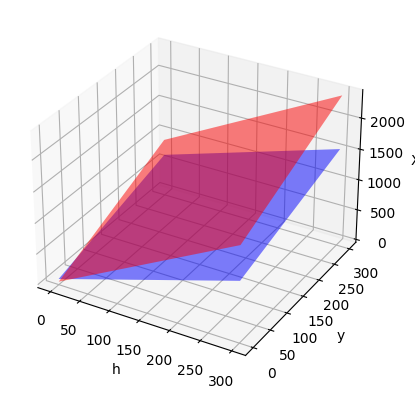

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 定义方程组
def equation1(h, y):
    return 3*h+2*y+45

def equation2(h, y):
    return 5*h+3*y

# 生成数据
h_vals = np.linspace(0, 300)
y_vals = np.linspace(0, 300)
h, y = np.meshgrid(h_vals, y_vals)
X1 = equation1(h, y)
X2 = equation2(h, y)

# 绘制图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面
ax.plot_surface(h, y, X1, alpha=0.5, rstride=100, cstride=100, color='b', label='X - 3h + 2y = 45')
ax.plot_surface(h, y, X2, alpha=0.5, rstride=100, cstride=100, color='r', label='X - 5h + 3y = 0')

# 设置坐标轴标签
ax.set_xlabel('h')
ax.set_ylabel('y')
ax.set_zlabel('X')

# 显示图形
plt.show()

In [16]:
from matplotlib import pyplot as plot
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

figure = plot.figure()
axes = Axes3D(figure)

h = np.arange(0,100,1)
y = np.arange(0,100,1)#前两个参数为自变量取值范围

h,y=np.meshgrid(h,y)

Z1 = 3*h+2*y+45
Z2 = 5*h+3*y
axes.plot_surface(h,y,Z1,cmap='rainbow')
axes.plot_surface(h,y,Z2,cmap='rainbow')
plot.show()


<Figure size 640x480 with 0 Axes>